# Comparison of Topological Embeddings Before First E2E Run. 

Lee Lancashire

Every Cure

16 August 2024. 

## Introduction

This notebook compares topological embeddings from two different sources:
1. Embeddings from an end-to-end (e2e) run
2. Embeddings from Chunyu's work

The analysis includes data loading, preprocessing, dimensionality reduction, visualization, and comparison of the embeddings.

Note: Your project should be organized as follows:

```
project_root/
│
├── data/
│   ├── raw/                 # Raw data files; TP, TN, Embeddings etc..
│   ├── processed/           # Processed data files produced by this notebook
│
├── notebooks/
│   └── 05_evaluate.ipynb    # This notebook
│
├── results/
│   ├── figures/             # Generated figures
│   └── models/              # Saved models
```

## Data Loading and Preprocessing

### Loading e2e Embeddings

The e2e embeddings are loaded from Parquet files stored in Google Cloud Storage.

In [5]:
# Not run
# 
# import gcsfs

# file_path = "gs://mtrx-us-central1-hub-dev-storage/releases/20240807/04_feature/rtx_kg2_nodes"

# fs = gcsfs.GCSFileSystem(project='mtrx-us-central1-hub-dev-storage')
# with fs.open(file_path, 'rb') as file:
#    obj = pd.read_parquet(file)

### Downloading Data

All files need to be downloaded using gsutil from the Google Cloud Storage bucket [eg here](https://console.cloud.google.com/storage/browser/mtrx-us-central1-hub-dev-storage/releases/20240807/05_model_input/drugs_diseases_nodes;tab=objects?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&project=mtrx-hub-dev-3of&prefix=&forceOnObjectsSortingFiltering=false&chat=true). The following command can be used to copy all data:

```bash
gsutil -m cp \
  "gs://mtrx-us-central1-hub-dev-storage/releases/20240807/05_model_input/drugs_diseases_nodes/* " .
  ```

### Importing Required Libraries

We import the necessary libraries for data manipulation, visualization, and machine learning tasks.

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import os

from IPython.display import Image, display




## Data Loading and Preprocessing

### Loading e2e Embeddings

The e2e embeddings are loaded from Parquet files stored in Google Cloud Storage.

In [4]:

# Define the directory where Parquet files are stored
directory_path = '../data/raw/05_embeddings_data/'

# List all Parquet files in the directory
parquet_files = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]


# Read each Parquet file into a DataFrame and concatenate them into one DataFrame
df = pd.concat([pd.read_parquet(os.path.join(directory_path, file)) for file in parquet_files], ignore_index=True)

### Processing e2e Embeddings

We process the loaded data and save it to a new Parquet file for easier access in future analyses.

In [5]:
# Path to the embeddings file
parquet_path = '../data/processed/topological_embeddings.parquet'

# Check if the file exists
if os.path.exists(parquet_path):
    # Load the DataFrame from the Parquet file
    final_df = pd.read_parquet(parquet_path)
else:
    # Convert the list of embeddings directly into a DataFrame
    embedding_df = pd.DataFrame(df['topological_embedding'].tolist())

    # Rename the columns to TE1, TE2, etc.
    embedding_df.columns = [f'TE{i+1}' for i in range(embedding_df.shape[1])]

    # Join the new columns back to the original DataFrame with the additional columns
    final_df = df[['id', 'name', 'category']].join(embedding_df)

    # Save the DataFrame to a CSV file
    final_df.to_csv('topological_embeddings.csv', index=False)

    # Save the DataFrame to a Parquet file
    final_df.to_parquet(parquet_path)

# Display the first few rows of the DataFrame to verify
final_df


,id,name,category,TE1,TE2,TE3,TE4,TE5,TE6,TE7,...,TE503,TE504,TE505,TE506,TE507,TE508,TE509,TE510,TE511,TE512
0,UMLS:C0775908,Asafetida Tincture,biolink:Drug,2.762366e-32,2.588563e-66,8.819362e-30,1.226528e-65,4.334934e-61,1.226693e-11,5.382879e-20,...,0.069010,0.069010,7.364172e-79,1.450837e-18,1.845099e-33,5.642932e-33,0.069010,0.069010,0.069010,8.042107e-71
1,UMLS:C0775076,Hydroquinone Powder,biolink:Drug,1.761803e-25,6.262243e-02,7.649446e-28,6.262243e-02,6.262243e-02,1.716841e-11,2.360101e-21,...,0.062622,0.062622,6.262243e-02,8.879277e-13,1.832034e-24,1.266503e-25,0.062622,0.062622,0.062622,6.262243e-02
2,UMLS:C4237687,Bromfenac Sodium Bulk powder,biolink:Drug,1.670094e-27,7.164594e-02,5.409929e-29,7.120692e-02,7.163979e-02,1.115442e-11,1.120049e-21,...,0.071646,0.071646,5.044239e-02,2.843080e-14,6.793688e-27,8.692048e-28,0.071646,0.071646,0.071646,1.949336e-02
3,REACT:R-ALL-9731197,PF-00835231 [cytosol],biolink:Drug,1.383146e-19,7.043168e-02,2.006351e-20,7.037671e-02,7.043116e-02,1.610154e-08,2.216364e-15,...,0.070432,0.070432,6.931194e-02,1.968364e-10,3.471745e-19,9.829441e-20,0.070432,0.070432,0.070432,6.934493e-02
4,UMLS:C0256140,neocnidilide,biolink:Drug,1.449573e-28,7.372893e-41,4.886710e-27,6.380856e-42,6.831340e-38,1.355204e-10,7.351284e-19,...,0.069172,0.069172,3.545905e-51,3.691001e-16,2.997572e-29,4.701530e-29,0.069172,0.069172,0.069172,3.863937e-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399832,UMLS:C4024822,Lacrimal gland aplasia,biolink:DiseaseOrPhenotypicFeature,1.203380e-18,6.262243e-02,3.971628e-20,6.262243e-02,6.262243e-02,1.695704e-08,1.853991e-15,...,0.062622,0.062622,6.262243e-02,1.262952e-09,6.671522e-18,1.027840e-18,0.062622,0.062622,0.062622,6.262243e-02
399833,UMLS:C1880518,Environmental Compatibility Problem,biolink:DiseaseOrPhenotypicFeature,1.583526e-27,1.367426e-55,4.330004e-25,1.538767e-56,9.810606e-52,6.514698e-10,7.785165e-17,...,0.069007,0.069007,3.008957e-67,4.096610e-16,1.154802e-28,4.080370e-28,0.069007,0.069007,0.069007,2.539641e-60
399834,UMLS:C1834034,Aplasia/Hypoplasia of the middle phalanx of th...,biolink:DiseaseOrPhenotypicFeature,5.490582e-25,1.288037e-36,6.409441e-24,5.175219e-39,2.441232e-35,1.072215e-09,1.258320e-16,...,0.069171,0.069171,3.376812e-45,3.427774e-14,1.490267e-25,1.796531e-25,0.069171,0.069171,0.069171,8.798345e-43
399835,UMLS:C3554587,Telangiectases of the cheeks,biolink:DiseaseOrPhenotypicFeature,5.364115e-24,7.326023e-20,1.241787e-23,4.351994e-22,5.587203e-19,1.346464e-09,7.827482e-17,...,0.075462,0.075462,2.088781e-27,3.228181e-13,3.846840e-24,2.482840e-24,0.075462,0.075462,0.075462,8.902954e-25


### Subsampling the Dataset

To manage computational resources, we subsample 30% of the data, stratified by category.

In [6]:
# Group by 'category' and sample 30% from each group

frac = 0.1

def load_or_generate_subsampled_df(final_df, frac=frac, random_state=42):
    csv_path = '../data/processed/subsampled_df.csv'
    parquet_path = '../data/processed/subsampled_df.parquet'
    
    # Check if the files exist
    if os.path.exists(csv_path) and os.path.exists(parquet_path):
        print("Loading existing subsampled DataFrame...")
        subsampled_df = pd.read_parquet(parquet_path)
    else:
        print("Generating new subsampled DataFrame...")
        # Group by 'category' and sample 30% from each group
        subsampled_df = final_df.groupby('category').apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)
        
        # Save the subsampled DataFrame
        subsampled_df.to_csv(csv_path, index=False)
        subsampled_df.to_parquet(parquet_path, index=False)
    
    print("Original DataFrame size:", final_df.shape[0])
    print("Subsampled DataFrame size:", subsampled_df.shape[0])
    
    # Display category distributions
    print("\nOriginal category distribution:")
    print(final_df['category'].value_counts())
    print("\nSubsampled category distribution:")
    print(subsampled_df['category'].value_counts())
    
    return subsampled_df

# Use the function
subsampled_df = load_or_generate_subsampled_df(final_df)

Loading existing subsampled DataFrame...
Original DataFrame size: 399837
Subsampled DataFrame size: 39983

Original category distribution:
category
biolink:SmallMolecule                 142112
biolink:Drug                          132977
biolink:Disease                        85423
biolink:DiseaseOrPhenotypicFeature     34413
biolink:PhenotypicFeature               4738
biolink:BehavioralFeature                174
Name: count, dtype: int64

Subsampled category distribution:
category
biolink:SmallMolecule                 14211
biolink:Drug                          13298
biolink:Disease                        8542
biolink:DiseaseOrPhenotypicFeature     3441
biolink:PhenotypicFeature               474
biolink:BehavioralFeature                17
Name: count, dtype: int64


## Dimensionality Reduction and Visualization

We apply three dimensionality reduction techniques to visualize the embeddings:
1. t-SNE (t-Distributed Stochastic Neighbor Embedding)
2. UMAP (Uniform Manifold Approximation and Projection)
3. PCA (Principal Component Analysis)

### t-SNE Visualization

In [7]:
from sklearn.manifold import TSNE
import numpy as np

def add_tsne_to_df(df, random_state=42):
    # Check if t-SNE columns already exist
    if 'tsne-2d-one' in df.columns and 'tsne-2d-two' in df.columns:
        print("t-SNE columns already exist. Skipping t-SNE computation.")
        return df

    print("Computing t-SNE...")
    
    # Extract only the TE columns for t-SNE
    te_columns = [col for col in df.columns if col.startswith('TE')]
    te_data = df[te_columns]

    # Run t-SNE
    tsne = TSNE(n_components=2, random_state=random_state)
    tsne_results = tsne.fit_transform(te_data)

    # Add the results back to the DataFrame
    df['tsne-2d-one'] = tsne_results[:, 0]
    df['tsne-2d-two'] = tsne_results[:, 1]

    # Save the updated DataFrame
    df.to_parquet('../data/processed/subsampled_df.parquet', index=False)
    
    print("t-SNE computation completed and results saved.")
    return df


subsampled_df = add_tsne_to_df(subsampled_df)



t-SNE columns already exist. Skipping t-SNE computation.


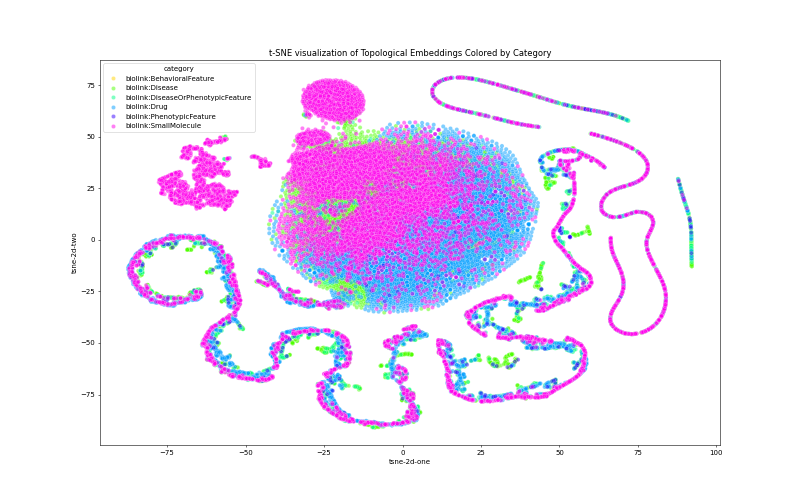

In [8]:
# Plot the result of t-SNE
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(subsampled_df['category'].unique())),
    data=subsampled_df,
    legend="full",
    alpha=0.5
)
plt.title('t-SNE visualization of Topological Embeddings Colored by Category')

plt.savefig('../results/figures/tSNE_EC.png', dpi=50)

#plt.show()
plt.close()

display(Image(filename='../results/figures/tSNE_EC.png'))


### UMAP Visualization

In [9]:
from umap import UMAP

def add_umap_to_df(df, random_state=42):
    # Check if UMAP columns already exist
    if 'umap-2d-one' in df.columns and 'umap-2d-two' in df.columns:
        print("UMAP columns already exist. Skipping UMAP computation.")
        return df

    print("Computing UMAP...")
    
    # Extract only the TE columns for UMAP
    te_columns = [col for col in df.columns if col.startswith('TE')]
    te_data = df[te_columns]

    # Run UMAP
    umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=random_state)
    umap_results = umap.fit_transform(te_data)

    # Add the results back to the DataFrame
    df['umap-2d-one'] = umap_results[:, 0]
    df['umap-2d-two'] = umap_results[:, 1]

    # Save the updated DataFrame
    df.to_parquet('../data/processed/subsampled_df.parquet', index=False)
    
    print("tUMAP computation completed and results saved.")
    return df


subsampled_df = add_umap_to_df(subsampled_df)




/Users/llanc/miniconda3/envs/disease-predict/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP columns already exist. Skipping UMAP computation.


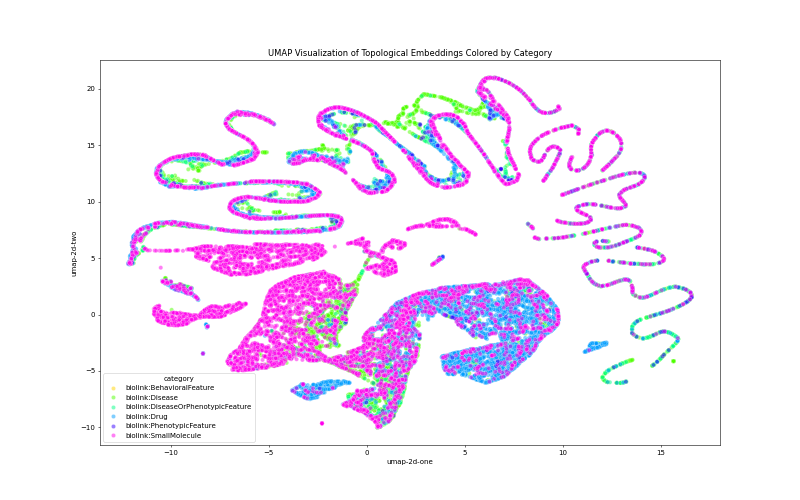

In [10]:
# Plot the result of UMAP
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(subsampled_df['category'].unique())),
    data=subsampled_df,
    legend="full",
    alpha=0.5
)
plt.title('UMAP Visualization of Topological Embeddings Colored by Category')

plt.savefig('../results/figures/UMAP_EC.png', dpi=50)

# plt.show()
plt.close()

display(Image(filename='../results/figures/UMAP_EC.png'))

### PCA Visualization

In [11]:
from sklearn.decomposition import PCA

def add_pca_to_df(df):
    # Check if PCA columns already exist
    if 'pca-2d-one' in df.columns and 'pca-2d-two' in df.columns:
        print("PCA columns already exist. Skipping PCA computation.")
        return df

    print("Computing PCA...")
    
    # Extract only the TE columns for PCA
    te_columns = [col for col in df.columns if col.startswith('TE')]
    te_data = df[te_columns]

    # Run PCA
    pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
    pca_results = pca.fit_transform(te_data)

    # Add the results back to the DataFrame
    df['pca-2d-one'] = pca_results[:, 0]
    df['pca-2d-two'] = pca_results[:, 1]

    # Save the updated DataFrame
    df.to_parquet('../data/processed/subsampled_df.parquet', index=False)
    
    print("PCA computation completed and results saved.")
    return df


subsampled_df = add_pca_to_df(subsampled_df)




PCA columns already exist. Skipping PCA computation.


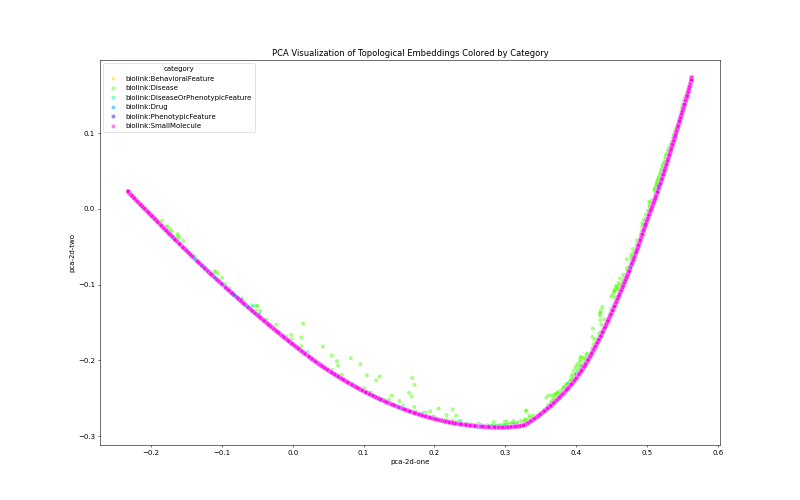

In [13]:
# Plot the result of PCA
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(subsampled_df['category'].unique())),
    data=subsampled_df,
    legend="full",
    alpha=0.5
)
plt.title('PCA Visualization of Topological Embeddings Colored by Category')
plt.savefig('../results/figures/PCA_EC.png', dpi=50)

# plt.show()
plt.close()

display(Image(filename='../results/figures/PCA_EC.png'))

## Loading and Processing Chunyu's Embeddings

We load Chunyu's embeddings from a pickle file and process them to match the structure of our e2e embeddings.

In [14]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

def process_chunyu_embeddings(pickle_path, subsampled_df, file_name='chunyu', analysis=False):
    chunyu_parquet_path = f'../data/processed/subsampled_df_{file_name}.parquet'
    
    if os.path.exists(chunyu_parquet_path):
        print(f"Loading existing {file_name} DataFrame...")
        final_df_chunyu = pd.read_parquet(chunyu_parquet_path)
    else:
        print(f"Processing {file_name} embeddings...")
        
        # Load the pickle file
        print("Loading pickle file...")
        with open(pickle_path, 'rb') as file:
            kg_dict_full = pickle.load(file)
        print("Pickle file loaded.")

        print("Subsetting data...")
        # Create a set of ids for faster lookup
        subset_ids = set(subsampled_df['id'])
        
        # Subset the dictionary
        subset_dict = {key: value for key, value in kg_dict_full.items() if key in subset_ids}

        # create dataframe
        keys = list(subset_dict.keys())
        values = np.array(list(subset_dict.values()))

        # Create DataFrame
        final_df_chunyu = pd.DataFrame(values, columns=[f'TE{i+1}' for i in range(values.shape[1])])
        final_df_chunyu['id'] = keys

        # Rearrange columns to put 'id' first
        final_df_chunyu = final_df_chunyu[['id'] + [col for col in final_df_chunyu.columns if col != 'id']]

        # add in additional information
        final_df_chunyu = final_df_chunyu.merge(subsampled_df[['id', 'name', 'category']], on='id', how='left')

        # Save the processed DataFrame
        final_df_chunyu.to_parquet(chunyu_parquet_path, index=False)
        print(f"Processed {file_name} DataFrame saved to {chunyu_parquet_path}")

    if analysis:
        analyzed_parquet_path = f'../data/processed/analyzed_df_{file_name}.parquet'
        
        if os.path.exists(analyzed_parquet_path):
            print(f"Loading existing analyzed {file_name} DataFrame...")
            final_df_chunyu = pd.read_parquet(analyzed_parquet_path)
        else:
            print("Performing dimensionality reduction...")
            # Extract only the TE columns for dimensionality reduction
            te_columns = [col for col in final_df_chunyu.columns if col.startswith('TE')]
            te_data = final_df_chunyu[te_columns]

            # Run t-SNE
            if 'tsne-2d-one' not in final_df_chunyu.columns:
                print("Running t-SNE...")
                tsne = TSNE(n_components=2, random_state=42)
                tsne_results = tsne.fit_transform(te_data)
                final_df_chunyu['tsne-2d-one'] = tsne_results[:, 0]
                final_df_chunyu['tsne-2d-two'] = tsne_results[:, 1]

            # Run UMAP
            if 'umap-2d-one' not in final_df_chunyu.columns:
                print("Running UMAP...")
                umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
                umap_results = umap.fit_transform(te_data)
                final_df_chunyu['umap-2d-one'] = umap_results[:, 0]
                final_df_chunyu['umap-2d-two'] = umap_results[:, 1]

            # Run PCA
            if 'pca-2d-one' not in final_df_chunyu.columns:
                print("Running PCA...")
                pca = PCA(n_components=2)
                pca_results = pca.fit_transform(te_data)
                final_df_chunyu['pca-2d-one'] = pca_results[:, 0]
                final_df_chunyu['pca-2d-two'] = pca_results[:, 1]
                print("Explained variance ratio:", pca.explained_variance_ratio_)

            # Save the analyzed DataFrame
            final_df_chunyu.to_parquet(analyzed_parquet_path, index=False)
            print(f"Analyzed {file_name} DataFrame saved to {analyzed_parquet_path}")

    return final_df_chunyu



In [15]:
# Create the subset dataset and perform dimensionality reduction
pickle_path = '../data/raw/unsuprvised_graphsage_entity_embeddings.pkl'
final_df_chunyu = process_chunyu_embeddings(pickle_path, subsampled_df, analysis=True)

Loading existing chunyu DataFrame...
Loading existing analyzed chunyu DataFrame...


In [16]:
# Organize all of Chunyu's data mapped to the full set of 300k embeddings for predictions later
raw_df_chunyu = process_chunyu_embeddings(pickle_path, final_df, file_name='chunyu_all', analysis=False)

Loading existing chunyu_all DataFrame...


## Visualizing Chunyu's Embeddings

We apply the same dimensionality reduction techniques (t-SNE, UMAP, PCA) to Chunyu's embeddings for comparison.

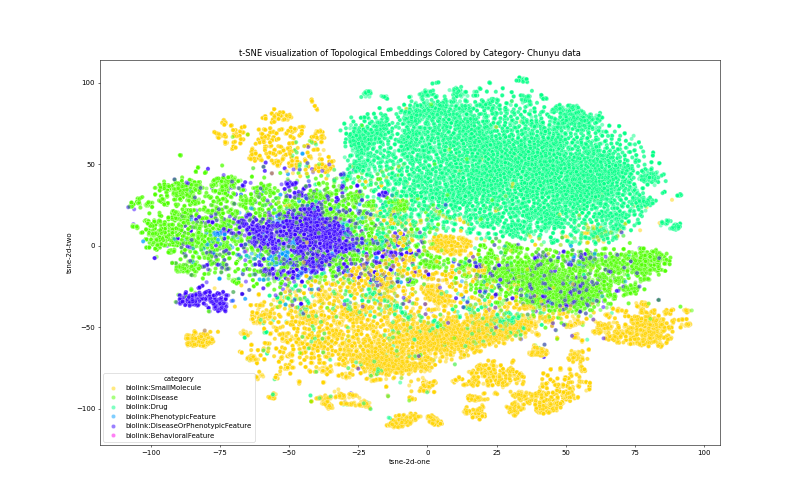

In [17]:
# Plot the result of t-SNE
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(final_df_chunyu['category'].unique())),
    data=final_df_chunyu,
    legend="full",
    alpha=0.5
)
plt.title('t-SNE visualization of Topological Embeddings Colored by Category- Chunyu data')

plt.savefig('../results/figures/tSNE_Chunyu.png', dpi=50)

# plt.show()
plt.close()

display(Image(filename='../results/figures/tSNE_Chunyu.png'))

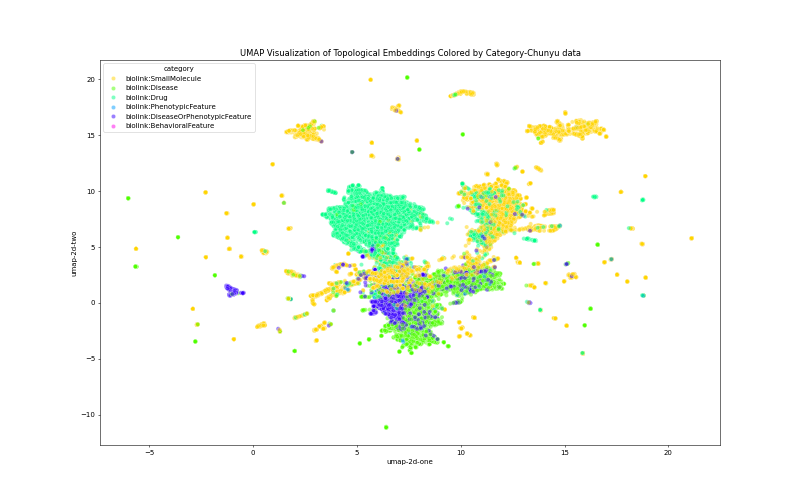

In [19]:
# Plot the result of UMAP
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(final_df_chunyu['category'].unique())),
    data=final_df_chunyu,
    legend="full",
    alpha=0.5
)
plt.title('UMAP Visualization of Topological Embeddings Colored by Category-Chunyu data')

plt.savefig('../results/figures/UMAP_Chunyu.png', dpi=50)

# plt.show()
plt.close()

display(Image(filename='../results/figures/UMAP_Chunyu.png'))

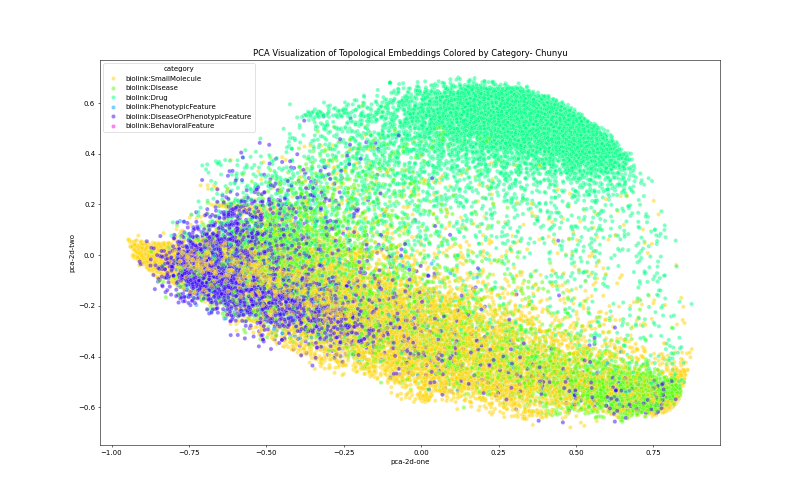

In [20]:
# Plot the result of PCA
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="category",
    palette=sns.color_palette("hsv", len(final_df_chunyu['category'].unique())),
    data=final_df_chunyu,
    legend="full",
    alpha=0.5
)
plt.title('PCA Visualization of Topological Embeddings Colored by Category- Chunyu')

plt.savefig('../results/figures/PCA_Chunyu.png', dpi=50)

# plt.show()
plt.close()

display(Image(filename='../results/figures/PCA_Chunyu.png'))

## Comparing the Embeddings

We compare the e2e and Chunyu's embeddings using various methods:

1. Cosine similarity
2. Distribution of individual embedding dimensions
3. Variance comparison
4. Correlation analysis

### Cosine Similarity

In [21]:
def generate_te_data(df1, df2):
    # Extract columns starting with 'TE' from both dataframes
    te_columns1 = [col for col in df1.columns if col.startswith('TE')]
    te_columns2 = [col for col in df2.columns if col.startswith('TE')]
    
    # Find common TE columns
    common_te_columns = list(set(te_columns1) & set(te_columns2))
    
    if not common_te_columns:
        raise ValueError("No common 'TE' columns found between the two dataframes")
    
    # Sort the common TE columns
    common_te_columns.sort(key=lambda x: int(x[2:]))  # Sort based on the number after 'TE'
    
    # Extract the TE data from both dataframes
    te_data1 = df1[common_te_columns]
    te_data2 = df2[common_te_columns]
    
    return te_data1, te_data2

In [22]:
te_data1, te_data2 = generate_te_data(subsampled_df, final_df_chunyu)

# Verify the column order
print("First few columns of te_data1:", te_data1.columns[:5].tolist())
print("First few columns of te_data2:", te_data2.columns[:5].tolist())
print("Last few columns of te_data1:", te_data1.columns[-5:].tolist())
print("Last few columns of te_data2:", te_data2.columns[-5:].tolist())

First few columns of te_data1: ['TE1', 'TE2', 'TE3', 'TE4', 'TE5']
First few columns of te_data2: ['TE1', 'TE2', 'TE3', 'TE4', 'TE5']
Last few columns of te_data1: ['TE508', 'TE509', 'TE510', 'TE511', 'TE512']
Last few columns of te_data2: ['TE508', 'TE509', 'TE510', 'TE511', 'TE512']


In [23]:
import seaborn as sns
import numpy as np

# Calculate cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
similarities = np.diagonal(cosine_similarity(te_data1, te_data2))



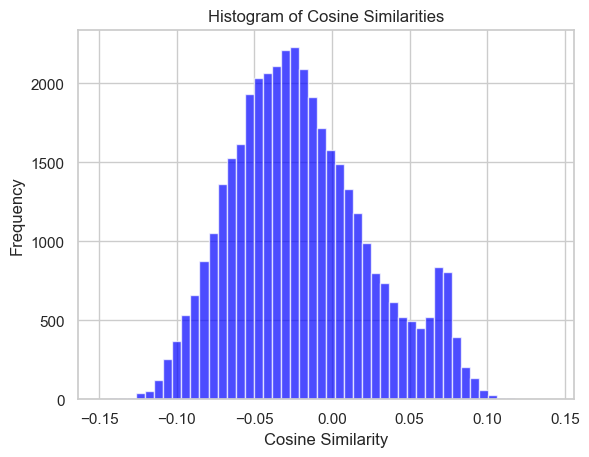

Mean Cosine Similarity: -0.019
Standard Deviation of Cosine Similarity: 0.045


In [28]:
import matplotlib.pyplot as plt

# Histogram of cosine similarities
plt.hist(similarities, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
mean_similarity = np.mean(similarities)
std_dev_similarity = np.std(similarities)

print(f"Mean Cosine Similarity: {mean_similarity:.3f}")
print(f"Standard Deviation of Cosine Similarity: {std_dev_similarity:.3f}")

plt.savefig('../results/figures/cosine_similarities_histogram.png')
plt.close()



There is very little similarity between the two sets of embeddings. 

### Distribution Comparison

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot density of 'feature_x' from te_data
sns.kdeplot(te_data1['TE2'], label='EC TE 1', color="blue", fill=True, alpha=0.5)

# Plot density of 'feature_x' from te_data2
sns.kdeplot(te_data2['TE2'], label='tchunyu TE 1', color="red", fill=True, alpha=0.5)

# Add labels and title
plt.title('Density Plot of TE1 in EC and Chuny Data')

plt.savefig('../results/figures/density_plot_TE1.png')
plt.close()

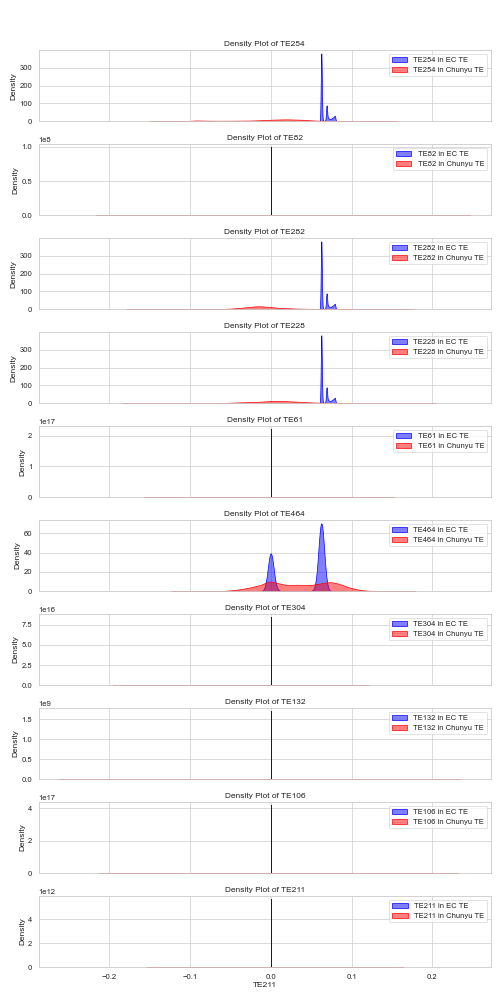

In [31]:
# compare several at onces
# Generate 10 random numbers between 1 and 512
import random

# Generate 10 random numbers between 1 and 512
random_numbers = [random.randint(1, 512) for _ in range(10)]

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 20), sharex='col')

# Use the random indices to plot specific columns
for idx, ax in zip(random_numbers, axes):
    col_name = te_data1.columns[idx]  
    sns.kdeplot(te_data1[col_name], ax=ax, label=f'{col_name} in EC TE', color="blue", fill=True, alpha=0.5)
    sns.kdeplot(te_data2[col_name], ax=ax, label=f'{col_name} in Chunyu TE', color="red", fill=True, alpha=0.5)
    ax.set_title(f'Density Plot of {col_name}')
    ax.set_ylabel('Density')
    ax.legend()

# define plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)
# plt.show()

plt.savefig('../results/figures/density_plots_multiple_TEs.png', dpi=50)
plt.close()

display(Image(filename='../results/figures/density_plots_multiple_TEs.png'))

EC embeddings appear to follow a distinct and repetetive pattern. 

### Variance Comparison

In [34]:
# Calculate variance for each column in te_data and te_data2
variances_te_data1 = te_data1.var()
variances_te_data2 = te_data2.var()

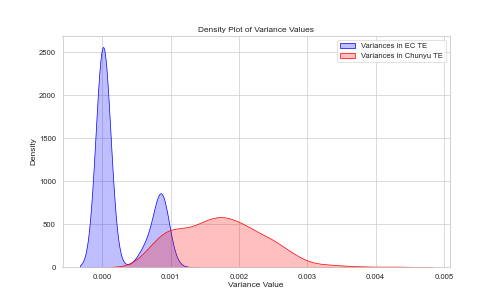

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot density of variances for te_data
sns.kdeplot(variances_te_data1, label='Variances in EC TE', color="blue", fill=True)

# Plot density of variances for te_data2
sns.kdeplot(variances_te_data2, label='Variances in Chunyu TE', color="red", fill=True)

plt.title('Density Plot of Variance Values')
plt.xlabel('Variance Value')
plt.ylabel('Density')

plt.legend()

# plt.show()

plt.savefig('../results/figures/variance_density_plot.png', dpi=50)
plt.close()

display(Image(filename='../results/figures/variance_density_plot.png'))

There is very little variance in the EC TE embeddings. 

### Correlation Analysis

In [36]:
# are the embeddings very similar across all dimensions? 

# Calculate the correlation matrix
correlation_matrix = te_data1.corr()
correlation_matrix2 = te_data2.corr()



In [37]:
# Create a mask (for visualization) with True where correlations are below 0.5 and above -0.5
mask = np.abs(correlation_matrix) <= 0.5
mask2 = np.abs(correlation_matrix2) <= 0.5

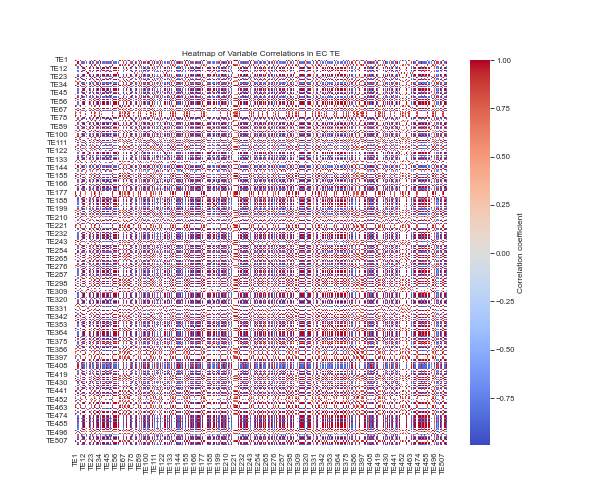

In [38]:
sns.set(style="white")

# Create a heatmap from the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=False, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})
plt.title('Heatmap of Variable Correlations in EC TE')
# plt.show()

plt.savefig('../results/figures/correlation_heatmap_EC_TE.png', dpi=50)
plt.close()

display(Image(filename='../results/figures/correlation_heatmap_EC_TE.png'))

This shows the overall and strange pattern of the EC embeddings. They are either very similar or dissimilar to one another. 

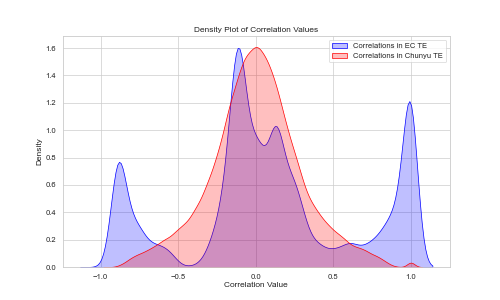

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot density of variances for te_data
sns.kdeplot(correlation_matrix.values.flatten(), label='Correlations in EC TE', color="blue", fill=True)

# Plot density of variances for te_data2
sns.kdeplot(correlation_matrix2.values.flatten(), label='Correlations in Chunyu TE', color="red", fill=True)

plt.title('Density Plot of Correlation Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')

plt.legend()
# plt.show()

plt.savefig('../results/figures/correlation_density_plot.png', dpi=50)
plt.close()

display(Image(filename='../results/figures/correlation_density_plot.png'))

Again, high correlations between EC TE embeddings and the three pattenrs observed. 

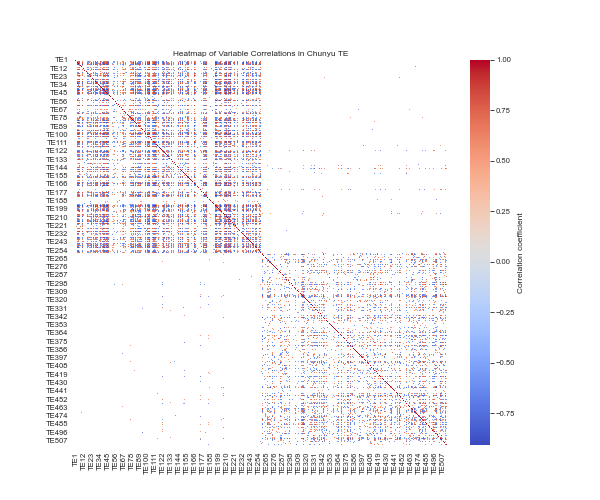

In [40]:
sns.set(style="white")

# Create a heatmap from the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, mask = mask2, annot=False, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})
plt.title('Heatmap of Variable Correlations in Chunyu TE')
# plt.show()

plt.savefig('../results/figures/correlation_heatmap_Chunyu_TE.png', dpi=50)
plt.close()

display(Image(filename='../results/figures/correlation_heatmap_Chunyu_TE.png'))

Chunyu's embeddings appear to group and are organized into a few distinct clusters. This is a strange observation which requires further investigation. Is this a consequence of the tokeninzation step, e.g. a lot of nodes are named with the same prefix? 

## Modeling

Run some predictions using the EC embeddings and compare to predictions using Chunyu's embeddings. 
We will use a simple random forest classifier to do this as an example. 



In [41]:
# From Alexei's notebook
# First step is to read in the treat, not-treat data and use these as our class labels. 

# Load in TN and TP dataset
tp_data = pd.read_csv('../data/raw/tp_pairs.txt', sep='\t', header=0)
tn_data = pd.read_csv('../data/raw/tn_pairs.txt', sep='\t', header=0)
# Add target column and concatenate
tp_data['y'] = 1; tn_data['y'] = 0

# Load knowledge graph node information
header = pd.read_csv('../data/raw/nodes_c_header.tsv', delimiter='\t', header=None).iloc[0]
node_df = pd.read_csv('../data/raw/nodes_c.tsv', delimiter='\t', names=header, dtype='unicode')

In [42]:

from sklearn.model_selection import train_test_split

# Test-train splits for TP + TN dataset
tptn_df = pd.concat([tp_data, tn_data])
train_tptn_df, test_tptn_df = train_test_split(tptn_df, test_size=0.1, random_state=42)

## Data Preparation Functions

The following functions are used to prepare our data for the random forest classifier. They extract embeddings and create vectorized datasets.

In [43]:
def get_embedding(id, embedding_df):
    # Get the row for the given id
    row = embedding_df[embedding_df['id'] == id]
    
    if row.empty:
        raise ValueError(f"No embedding found for id: {id}")
    
    # Select only the columns that start with 'TE'
    te_columns = [col for col in embedding_df.columns if col.startswith('TE')]
    
    # Sort the TE columns to ensure correct order
    te_columns.sort(key=lambda x: int(x[2:]))
    
    # Return the flattened array of TE values
    return row[te_columns].values.flatten()



In [44]:
# Test the function
test_id = subsampled_df['id'].iloc[0]  # Get the first id as a test
test_embedding = get_embedding(test_id, subsampled_df)

print(f"Embedding for id {test_id}:")
print(f"Number of features: {len(test_embedding)}")
print(f"First 5 values: {test_embedding[:5]}")
print(f"Last 5 values: {test_embedding[-5:]}")

Embedding for id NBO:0000243:
Number of features: 512
First 5 values: [3.36019938e-24 4.46283259e-43 3.11462620e-22 9.73966383e-45
 2.38311186e-40]
Last 5 values: [1.13483378e-24 6.90164426e-02 6.90164426e-02 6.90164426e-02
 1.75070987e-47]


In [45]:
import numpy as np
import pandas as pd

def give_vectorised_dataset(df, embedding_df):
    # Get unique IDs from source and target columns
    unique_ids = set(df['source'].unique()) | set(df['target'].unique())
    
    # Subset embedding_df to only include relevant IDs
    relevant_embeddings = embedding_df[embedding_df['id'].isin(unique_ids)]
    
    # Create a dictionary for quick lookup
    embedding_dict = {row['id']: row.filter(like='TE').values for _, row in relevant_embeddings.iterrows()}
    
    # Get the number of TE columns
    n_features = len([col for col in relevant_embeddings.columns if col.startswith('TE')])
    
    X = []
    y = []
    found_count = 0
    total_count = len(df)
    
    for _, row in df.iterrows():
        source_id = row['source']
        target_id = row['target']
        
        if source_id in embedding_dict and target_id in embedding_dict:
            drug_vector = embedding_dict[source_id]
            disease_vector = embedding_dict[target_id]
            X.append(np.concatenate([drug_vector, disease_vector]))
            y.append(row['y'])
            found_count += 1
    
    X = np.array(X, dtype='float32')
    y = np.array(y)
    
    print(f"Processed {found_count} out of {total_count} entries.")
    print(f"Skipped {total_count - found_count} entries due to missing embeddings.")
    
    return X, y, found_count



In [46]:
# Use the function
X_test, y_test, found_count = give_vectorised_dataset(test_tptn_df, subsampled_df)

print(f"Shape of X: {X_test.shape}")
print(f"Shape of y: {y_test.shape}")
print(f"Total valid entries: {found_count}")

Processed 83 out of 5463 entries.
Skipped 5380 entries due to missing embeddings.
Shape of X: (83, 1024)
Shape of y: (83,)
Total valid entries: 83


In [47]:
train_tptn_df

,source,target,y
8489,CHEMBL.COMPOUND:CHEMBL1201589,MONDO:0019945,1
4153,CHEMBL.COMPOUND:CHEMBL1905872,MONDO:0006665,0
14861,RXNORM:203279,MONDO:0011728,1
6939,CHEMBL.COMPOUND:CHEMBL1200881,MONDO:0010383,1
25668,CHEMBL.COMPOUND:CHEMBL1889140,MONDO:0004568,0
...,...,...,...
23295,CHEMBL.COMPOUND:CHEMBL163,MONDO:0012819,0
32906,CHEMBL.COMPOUND:CHEMBL1201566,MONDO:0005233,0
16721,CHEMBL.COMPOUND:CHEMBL1511,MONDO:0013775,0
860,CHEMBL.COMPOUND:CHEMBL635,MONDO:0012959,1


## Random Forest Classifier Building and Evaluation

This function builds a random forest classifier using grid search for hyperparameter tuning, 
trains it on the provided data, and evaluates its performance.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def build_and_evaluate_rf_classifier(X_train, y_train, X_test, y_test):
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a base model
    rf = RandomForestClassifier(random_state=42)

    # Instantiate the grid search model
    print("Performing grid search...")
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=3, n_jobs=-1, verbose=2)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_

    # Make predictions on the test set
    print("Making predictions...")
    y_pred = best_rf.predict(X_test)
    y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    return best_rf, (y_test, y_pred, y_pred_proba)


## Feature Importance Analysis

This function analyzes and visualizes the feature importance of the trained random forest model.

In [49]:
def analyze_feature_importance(best_rf):
    feature_importance = best_rf.feature_importances_
    feature_names = [f"Feature_{i}" for i in range(len(feature_importance))]
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False).head(20)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title('Top 20 Most Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('../results/figures/feature_importance_rf.png')
    plt.show()

    return importance_df


## Run and Compare


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to process data and train model for a given embedding
def process_and_evaluate(train_tptn_df, test_tptn_df, embedding_df, name):
    print(f"\nProcessing {name} embeddings...")
    
    # Prepare training data
    X_train, y_train, train_count = give_vectorised_dataset(train_tptn_df, embedding_df)
    print(f"Training data: processed {train_count} out of {len(train_tptn_df)} entries.")
    
    # Prepare test data
    X_test, y_test, test_count = give_vectorised_dataset(test_tptn_df, embedding_df)
    print(f"Test data: processed {test_count} out of {len(test_tptn_df)} entries.")
    
    # Train and evaluate model
    best_rf, (y_test, y_pred, y_pred_proba) = build_and_evaluate_rf_classifier(X_train, y_train, X_test, y_test)
    
    # Analyze feature importance
    feature_importance = analyze_feature_importance(best_rf)
    feature_importance.to_csv(f'../results/feature_importance_rf_{name.lower()}.csv', index=False)
    
    return best_rf, X_test, y_test, y_pred, y_pred_proba, feature_importance



In [51]:
# Process both e2e and Chunyu embeddings
import pickle
import os

def load_or_process_embeddings(train_tptn_df, test_tptn_df, embedding_dfs):
    results_path = '../results/rf_results.pkl'
    
    if os.path.exists(results_path):
        print("Loading existing results...")
        with open(results_path, 'rb') as f:
            results = pickle.load(f)
    else:
        print("Processing embeddings and evaluating models...")
        results = {}
        for name, embedding_df in embedding_dfs.items():
            print(f"\nProcessing {name} embeddings...")
            results[name] = process_and_evaluate(train_tptn_df, test_tptn_df, embedding_df, name)
        
        # Save the results
        with open(results_path, 'wb') as f:
            pickle.dump(results, f)
        print(f"Results saved to {results_path}")
    
    return results




In [52]:
embedding_dfs = {
    "E2E": final_df,
    "Chunyu": raw_df_chunyu
}

results = load_or_process_embeddings(train_tptn_df, test_tptn_df, embedding_dfs)

# Now you can use the results for further analysis or visualization
for name, result in results.items():
    print(f"\nResults for {name} embeddings:")
    best_rf, X_test, y_test, y_pred, y_pred_proba, feature_importance = result
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    # Add any other metrics or analyses you want to perform


Loading existing results...

Results for E2E embeddings:
Accuracy: 0.7000
AUC-ROC: 0.6613

Results for Chunyu embeddings:
Accuracy: 0.9195
AUC-ROC: 0.9737


/Users/llanc/miniconda3/envs/disease-predict/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llanc/miniconda3/envs/disease-predict/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/llanc/miniconda3/envs/disease-predict/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying 

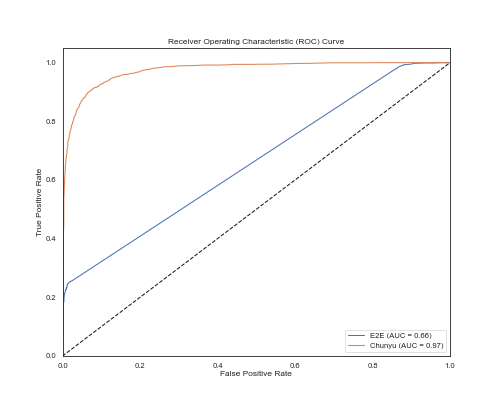

In [55]:
# Compare ROC curves
plt.figure(figsize=(10, 8))
for name, (_, _, y_test, _, y_pred_proba, _) in results.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('../results/figures/roc_curve_comparison.png', dpi=50)
# plt.show()
plt.close()
display(Image(filename='../results/figures/roc_curve_comparison.png'))



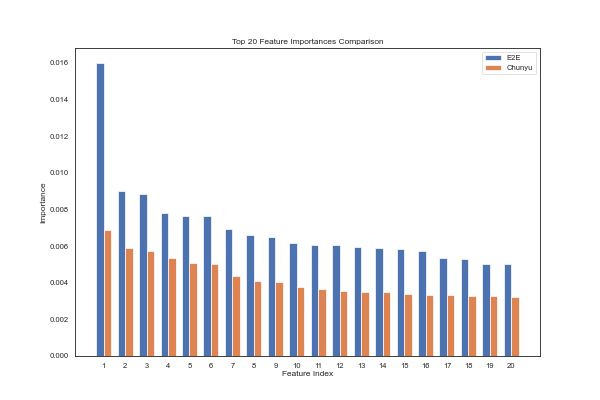

In [56]:
# Compare feature importances
plt.figure(figsize=(12, 8))
width = 0.35
x = np.arange(20)

for i, (name, (_, _, _, _, _, feature_importance)) in enumerate(results.items()):
    importance = feature_importance['importance'][:20]
    plt.bar(x + i*width, importance, width, label=name)

plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances Comparison')
plt.xticks(x + width/2, range(1, 21))
plt.legend()
plt.savefig('../results/figures/feature_importance_comparison.png', dpi=50)
# plt.show()
plt.close()
display(Image(filename='../results/figures/feature_importance_comparison.png'))


In [57]:
# Print summary of results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, (_, _, y_test, y_pred, y_pred_proba, _) in results.items():
    print(f"\nResults for {name} embeddings:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")


Results for E2E embeddings:
Accuracy: 0.7000
Precision: 0.9264
Recall: 0.2348
F1 Score: 0.3747
AUC-ROC: 0.6613

Results for Chunyu embeddings:
Accuracy: 0.9195
Precision: 0.9061
Recall: 0.8809
F1 Score: 0.8933
AUC-ROC: 0.9737
